In [55]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [56]:
num_frames = 100
timestep = 0.05
t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
# s_vals = np.linspace(0.0, 2*np.pi, 101)
s_vals = np.linspace(0.0, 100, 101)
s_vals[0] = 1e-10
s_vals = s_vals[:-1]
print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

# get the range of k values
k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = 2 * np.pi * k_vals
# print(k_vals)
print(f"shape of k_vals : {k_vals.shape}")

[1.0e-10 1.0e+00 2.0e+00 3.0e+00 4.0e+00 5.0e+00 6.0e+00 7.0e+00 8.0e+00
 9.0e+00 1.0e+01 1.1e+01 1.2e+01 1.3e+01 1.4e+01 1.5e+01 1.6e+01 1.7e+01
 1.8e+01 1.9e+01 2.0e+01 2.1e+01 2.2e+01 2.3e+01 2.4e+01 2.5e+01 2.6e+01
 2.7e+01 2.8e+01 2.9e+01 3.0e+01 3.1e+01 3.2e+01 3.3e+01 3.4e+01 3.5e+01
 3.6e+01 3.7e+01 3.8e+01 3.9e+01 4.0e+01 4.1e+01 4.2e+01 4.3e+01 4.4e+01
 4.5e+01 4.6e+01 4.7e+01 4.8e+01 4.9e+01 5.0e+01 5.1e+01 5.2e+01 5.3e+01
 5.4e+01 5.5e+01 5.6e+01 5.7e+01 5.8e+01 5.9e+01 6.0e+01 6.1e+01 6.2e+01
 6.3e+01 6.4e+01 6.5e+01 6.6e+01 6.7e+01 6.8e+01 6.9e+01 7.0e+01 7.1e+01
 7.2e+01 7.3e+01 7.4e+01 7.5e+01 7.6e+01 7.7e+01 7.8e+01 7.9e+01 8.0e+01
 8.1e+01 8.2e+01 8.3e+01 8.4e+01 8.5e+01 8.6e+01 8.7e+01 8.8e+01 8.9e+01
 9.0e+01 9.1e+01 9.2e+01 9.3e+01 9.4e+01 9.5e+01 9.6e+01 9.7e+01 9.8e+01
 9.9e+01]
shape of k_vals : (500,)


In [57]:
alpha0 = 0.5
d0 = 2.0

In [58]:
data = np.zeros((num_frames, k_vals.shape[0]))
print(f"shape of data : {data.shape}")

shape of data : (100, 500)


In [59]:
# fill data with \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}
for i in range(num_frames):
    data[i] = (s_vals[i]**(alpha0-1)) / (s_vals[i]**(alpha0-1) + d0*k_vals**2)
print(data)

[[1.         0.9999998  0.9999992  ... 0.9999982  0.9999992  0.9999998 ]
 [1.         0.98039216 0.92592593 ... 0.84745763 0.92592593 0.98039216]
 [1.         0.97249372 0.89836195 ... 0.7970932  0.89836195 0.97249372]
 ...
 [1.         0.83543783 0.5593127  ... 0.36064701 0.5593127  0.83543783]
 [1.         0.83473158 0.5580483  ... 0.35946538 0.5580483  0.83473158]
 [1.         0.8340301  0.55679599 ... 0.35829742 0.55679599 0.8340301 ]]


In [60]:
# inverse fourier transform on k
data = fft.ifft(data, axis=1).real
print(data)

[[ 9.95864274e-01  2.50847534e-03 -6.20031959e-04 ...  2.75022203e-04
  -6.20031959e-04  2.50847534e-03]
 [ 4.36290405e-02  4.07446319e-02  3.71622745e-02 ...  3.40485864e-02
   3.71622745e-02  4.07446319e-02]
 [ 3.67944631e-02  3.47362518e-02  3.21509740e-02 ...  2.98690507e-02
   3.21509740e-02  3.47362518e-02]
 ...
 [ 1.40758174e-02  1.37713063e-02  1.33743120e-02 ...  1.30058087e-02
   1.33743120e-02  1.37713063e-02]
 [ 1.40399797e-02  1.37370121e-02  1.33420069e-02 ...  1.29753213e-02
   1.33420069e-02  1.37370121e-02]
 [ 1.40045952e-02  1.37031476e-02  1.33101017e-02 ...  1.29452066e-02
   1.33101017e-02  1.37031476e-02]]


In [61]:
# inverse laplace transform on s
G_pred = np.zeros((num_frames, r_vals.shape[0]))
for i in range(num_frames):
    for j in range(r_vals.shape[0]):
        G_pred[i, j] = np.trapz(data[:, j] * np.exp(s_vals * t_vals[i]), s_vals)
print(G_pred)

[[2.30626289e+000 1.75484484e+000 1.68280551e+000 ... 1.61891848e+000
  1.68280551e+000 1.75484484e+000]
 [4.25577364e+001 4.10806098e+001 3.98037028e+001 ... 3.86238853e+001
  3.98037028e+001 4.10806098e+001]
 [2.87591573e+003 2.81163728e+003 2.72853443e+003 ... 2.65146186e+003
  2.72853443e+003 2.81163728e+003]
 ...
 [2.39085376e+206 2.33938884e+206 2.27228577e+206 ... 2.20998883e+206
  2.27228577e+206 2.33938884e+206]
 [3.37270393e+208 3.30010409e+208 3.20544402e+208 ... 3.11756381e+208
  3.20544402e+208 3.30010409e+208]
 [4.75794745e+210 4.65552945e+210 4.52199065e+210 ... 4.39801632e+210
  4.52199065e+210 4.65552945e+210]]


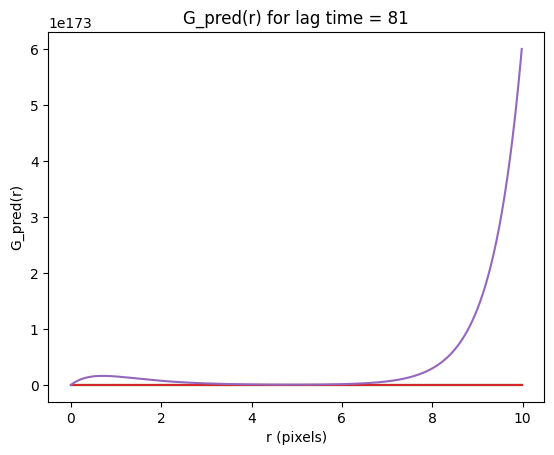

In [62]:
# plot G_pred
for i in range(1, num_frames, 20):
    plt.plot(r_vals, G_pred[i, :] * 2 * np.pi * r_vals)
    # plt.plot(r_vals[:-1], G_pred[i, :])
    plt.xlabel("r (pixels)")
    plt.ylabel("G_pred(r)")
    plt.title(f"G_pred(r) for lag time = {i}")
    # plt.show()
plt.show()

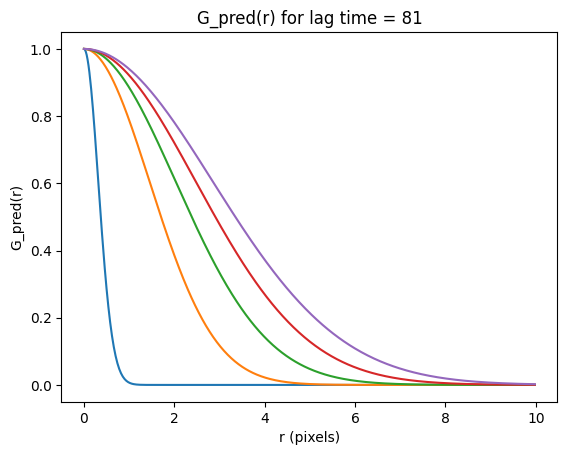

In [63]:
tester = np.zeros((num_frames, r_vals.shape[0]))
t_vals[0] = 1e-10
# make it a gaussian
for i in range(num_frames):
    tester[i, :] = np.exp(-r_vals**2 / (4 * t_vals[i]))
# plot tester
for i in range(1, num_frames, 20):
    plt.plot(r_vals, tester[i, :])
    # plt.plot(r_vals[:-1], tester[i, :])
    plt.xlabel("r (pixels)")
    plt.ylabel("G_pred(r)")
    plt.title(f"G_pred(r) for lag time = {i}")
    # plt.show()
plt.show()

In [64]:
lptrans = np.zeros((num_frames, r_vals.shape[0]))
for i in range(num_frames):
    for j in range(r_vals.shape[0]):
        lptrans[i, j] = np.trapz(tester[:, j] * np.exp(-s_vals[i] * t_vals), t_vals)
# print(lptrans)

In [65]:
# inverse laplace transform on s
invlptrans = np.zeros((num_frames, r_vals.shape[0]))
for i in range(num_frames):
    for j in range(r_vals.shape[0]):
        invlptrans[i, j] = np.trapz(lptrans[:, j] * np.exp(s_vals * t_vals[i]), s_vals)

# normalize
for i in range(num_frames):
    invlptrans[i, :] = invlptrans[i, :] / invlptrans[i, 0]

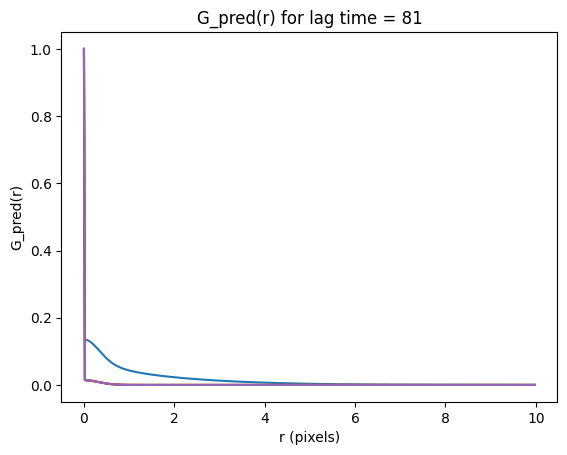

In [66]:
# plot invlptrans
for i in range(1, num_frames, 20):
    plt.plot(r_vals, invlptrans[i, :])
    # plt.plot(r_vals[:-1], invlptrans[i, :])
    plt.xlabel("r (pixels)")
    plt.ylabel("G_pred(r)")
    plt.title(f"G_pred(r) for lag time = {i}")
    # plt.show()
plt.show()